<a href="https://colab.research.google.com/github/uzimanoko/manoko/blob/main/Group_8_Predicting_Maternal_Health_Risk_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predicting Maternal Health Risk Level***

---



# ***Table of Content***

1. [Introduction](#Introduction)
2. [Data Loading](#DL)
3. [Exploratory Data Analysis](#EDA)
4. [ Data Preprocessing](#DP)
5. [ Modelling](#M)
6. [Conclusion](#Con)

<a name="Introduction"></a>
# ***1. Introduction***


 The following notebook focuses on creating a Decision Tree Model that predicts the maternal health risk level. This is of great importance as it tells us if a particular individual will face pregnancy complications later on. The dataset used may be found on the UC Irvine Machine Learning Repository website (https://archive.ics.uci.edu/dataset/863/maternal+health+risk). It consists of 1013 rows and 7 columns which are as follows:

 - Age
 - Systolic blood pressure (SystolicBP) in mmHg
 - Diastolic blood pressure (DiastolicBP) in mmHg
 - Blood Sugar Levels (BS) in mmol/L  
 - Body Temperature (BodyTemp) in F
 - Heart Rate in bpm
 - Risk Level


<a name="DL"></a>
# ***2. Data Loading***


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

<a name="EDA"></a>
# ***3. Exploratory Data Analysis***


##  ***3.1 Data Overview***

In [ ]:
df.shape # Diplays the number of columns and rows of the dataset

(1014, 7)

In [ ]:
df.head(5) # Display first 5 rows

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.tail(5) # Display last 5 rows

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [ ]:
df.info() # Display the basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe() # Display the basic stats about the dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.duplicated().sum() # The number of dupllicates in the dataset

562

## ***3.2 Visualizations***

### ***3.2.1 Univariate Analysis***

count         1014
unique           3
top       low risk
freq           406
Name: RiskLevel, dtype: object


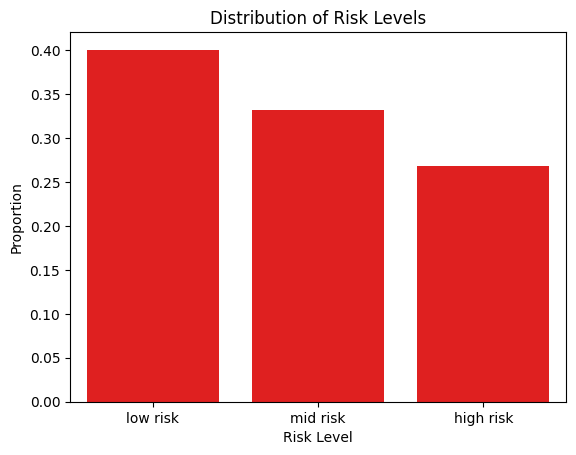

In [ ]:
# Distribution of the 'RiskLevel' column within our dataset, showing the propotion  for each category in the column
print(df['RiskLevel'].describe())
proportions = (df['RiskLevel'].value_counts(normalize=True))

# Create a bar plot using the proportions
sns.barplot(x=proportions.index, y=proportions.values, color='r')
plt.title('Distribution of Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Proportion')
plt.show()

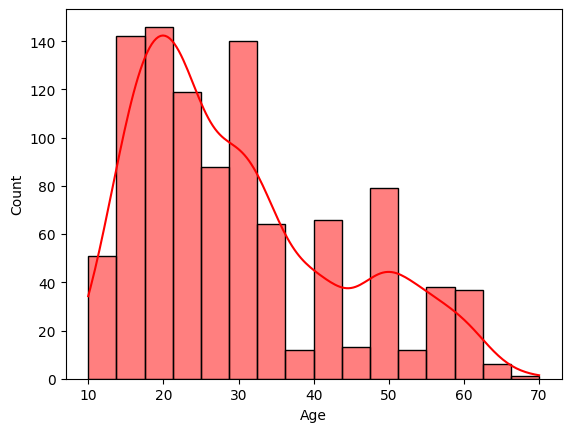

In [ ]:
# Distribution of Age
sns.histplot(data=df, x=df["Age"], kde=True, color='r')
plt.show()

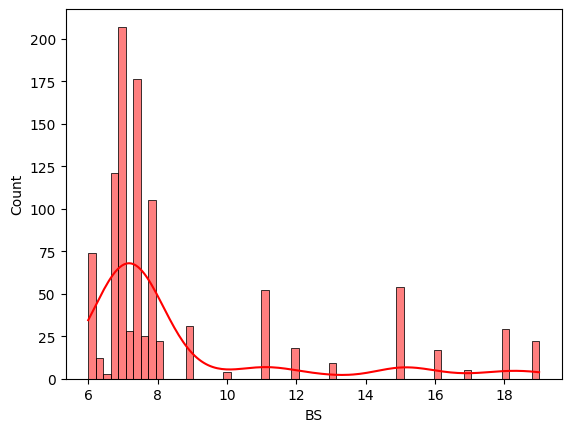

In [ ]:
# Distribution of Blood Sugar
sns.histplot(data=df, x=df["BS"], kde=True, color='r')
plt.show()

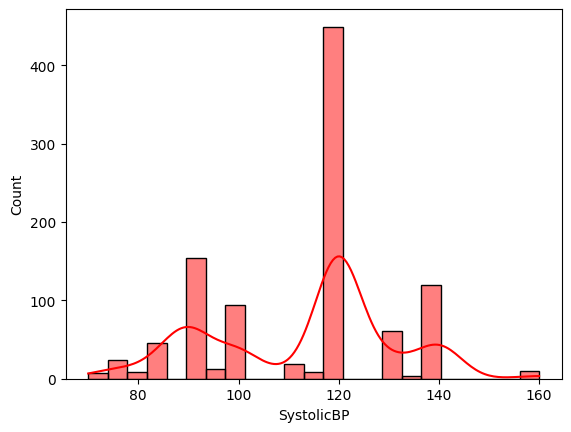

In [ ]:
# Distribution of SystolicBP
sns.histplot(data=df, x=df["SystolicBP"], kde=True, color='r')
plt.show()

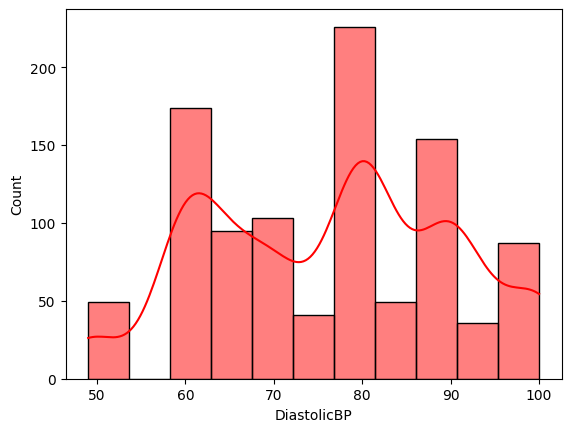

In [ ]:
# Distribution of DiastolicBP
sns.histplot(data=df, x=df["DiastolicBP"], kde=True, color='r')
plt.show()

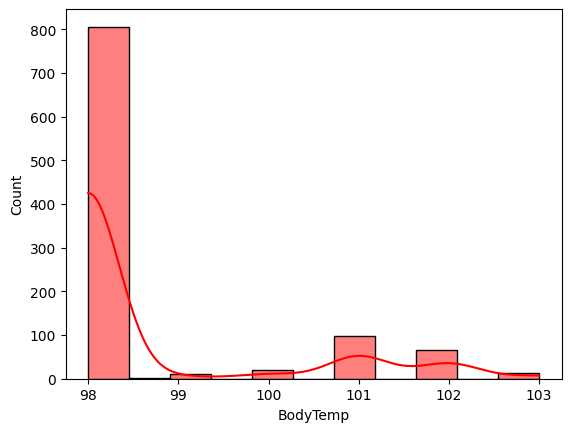

In [ ]:
# Distribution of Body Temperature
sns.histplot(data=df, x=df["BodyTemp"], kde=True, color='r')
plt.show()


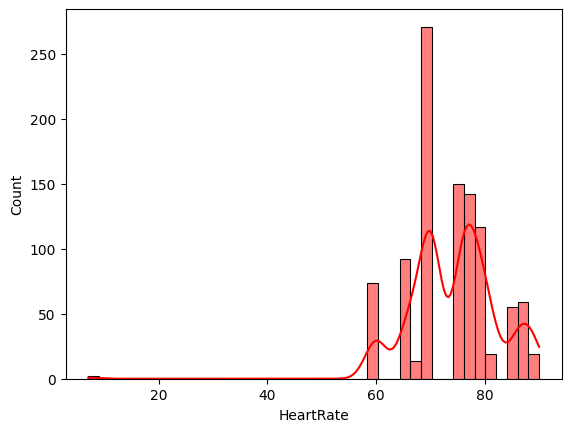

In [ ]:
# Distribution of the HeartRate
sns.histplot(data=df, x=df["HeartRate"], kde=True, color='r')
plt.show()

### ***3.2.2 Bivariate Analysis***

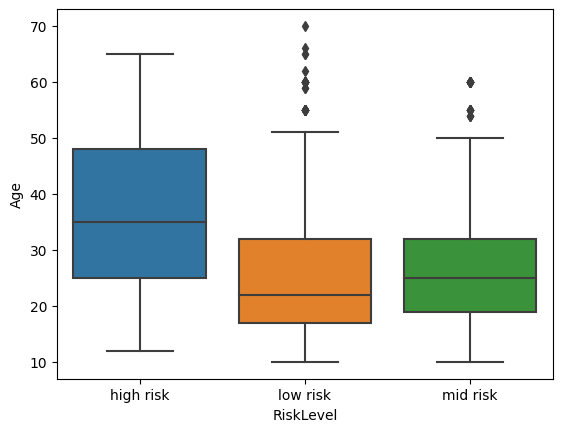

In [ ]:
# Boxplot for Risk Level VS Age
sns.boxplot(x="RiskLevel", y="Age", data= df)
plt.show()

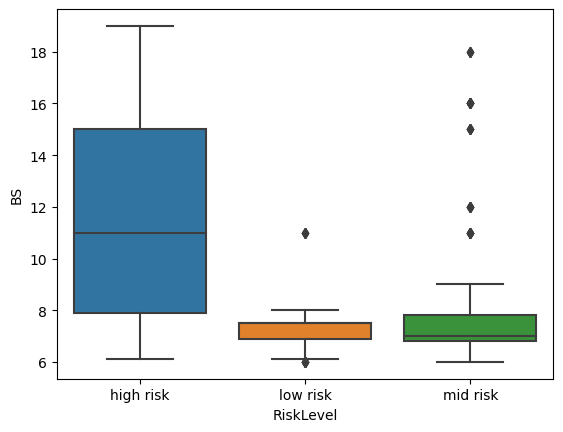

In [ ]:
# Boxplot for Risk Level VS Blood Sugar
sns.boxplot(x="RiskLevel", y="BS", data= df)
plt.show()

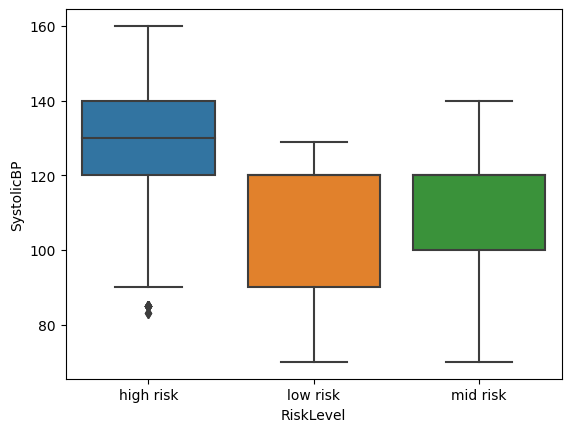

In [ ]:
# Boxplot for Risk Level VS SystolicBP
sns.boxplot(x="RiskLevel", y="SystolicBP", data= df)
plt.show()

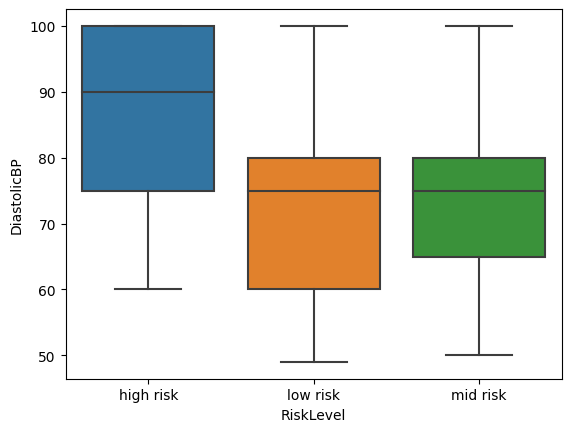

In [ ]:
# Boxplot for Risk Level VS DiastollicBP
sns.boxplot(x="RiskLevel", y='DiastolicBP', data= df)
plt.show()

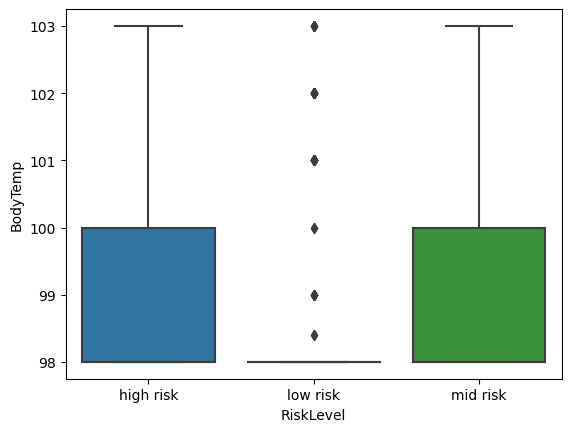

In [ ]:
# Boxplot for Risk Level VS Body Temperature
sns.boxplot(x="RiskLevel", y='BodyTemp', data= df)
plt.show()

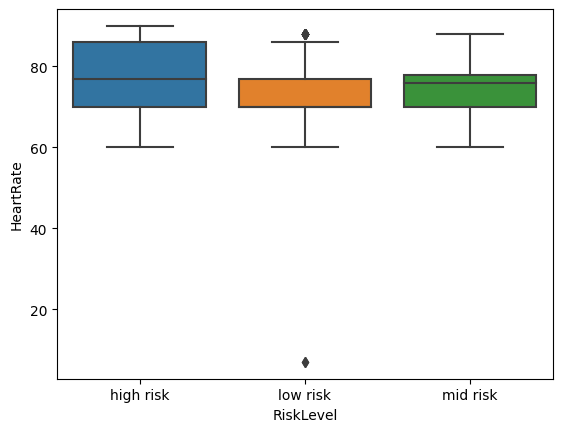

In [ ]:
# Boxplot for Risk Level VS Heart rate
sns.boxplot(x="RiskLevel", y='HeartRate', data= df)
plt.show()

### ***3.2.3 Correlation Analysis***

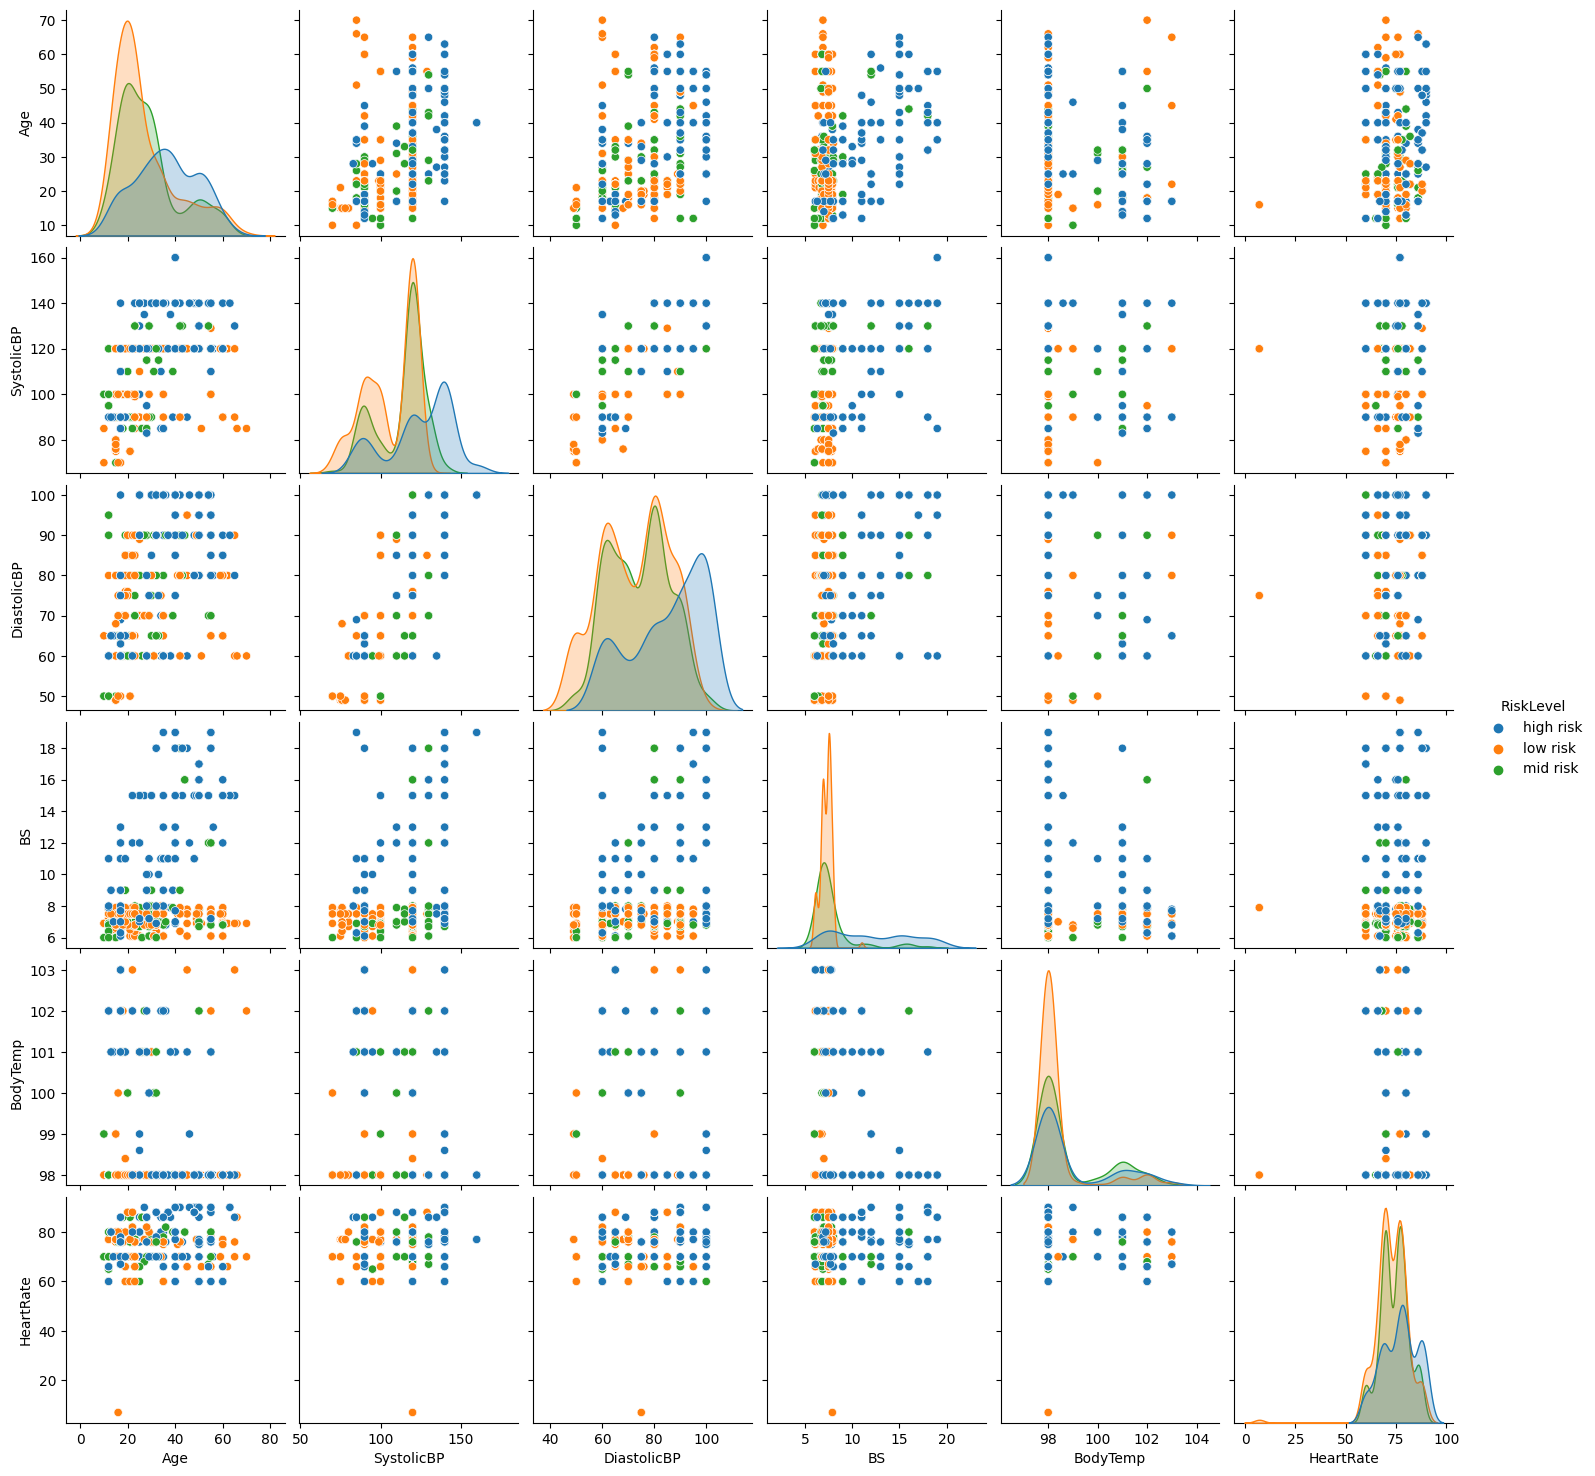

In [ ]:
# Feature to Feature distribution with the hue parameter as Risk level
sns.pairplot(df, vars=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], hue='RiskLevel')
plt.show()

<ipython-input-23-92cf0995eabd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


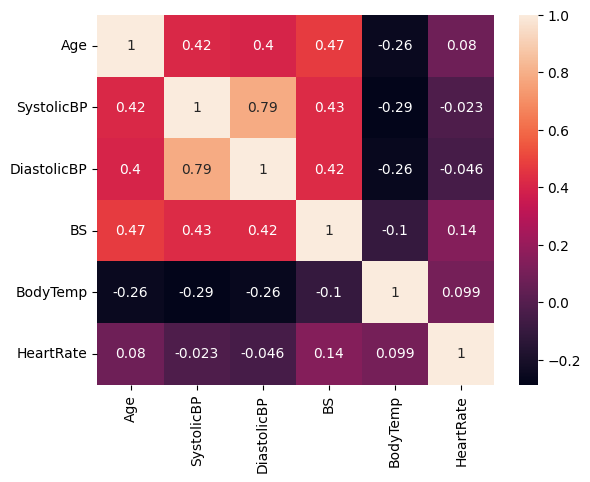

In [ ]:
# Heatmap to view the correlation between different features
sns.heatmap(df.corr(), annot= True)
plt.show()

<a name="DP"></a>
# ***4. Data Preprocessing***

In [ ]:
# Checking the number of missing values under each feature
print("Total null values at each column: \n", df.isnull().sum())

Total null values at each column: 
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
# Encoding the categorical target values
label = LabelEncoder()

# Adding a new column of the encoded target values
df['Target_column_label'] = label.fit_transform(df['RiskLevel'])

In [ ]:
# Revisting the modified dataframe's first ten rows
df.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Target_column_label
0,25,130,80,15.00,98.0,86,high risk,0
1,35,140,90,13.00,98.0,70,high risk,0
2,29,90,70,8.00,100.0,80,high risk,0
3,30,140,85,7.00,98.0,70,high risk,0
4,35,120,60,6.10,98.0,76,low risk,1
5,23,140,80,7.01,98.0,70,high risk,0
6,23,130,70,7.01,98.0,78,mid risk,2
7,35,85,60,11.00,102.0,86,high risk,0
8,32,120,90,6.90,98.0,70,mid risk,2
9,42,130,80,18.00,98.0,70,high risk,0


<a name="M"></a>
# ***5. Modelling***

## ***5.1 Training the Model***

In [ ]:
# Storing the features in X and the target values in y
X = df.iloc[:, 0:6]
y = df.iloc[:, 7]

# Splitting the data into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Assigning the Decision Tree Classfier instance to a variable
model = DecisionTreeClassifier(random_state=42, max_depth=4)

# Training the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Testing the model by predicting the y values of the X test data
y_pred = model.predict(X_test)

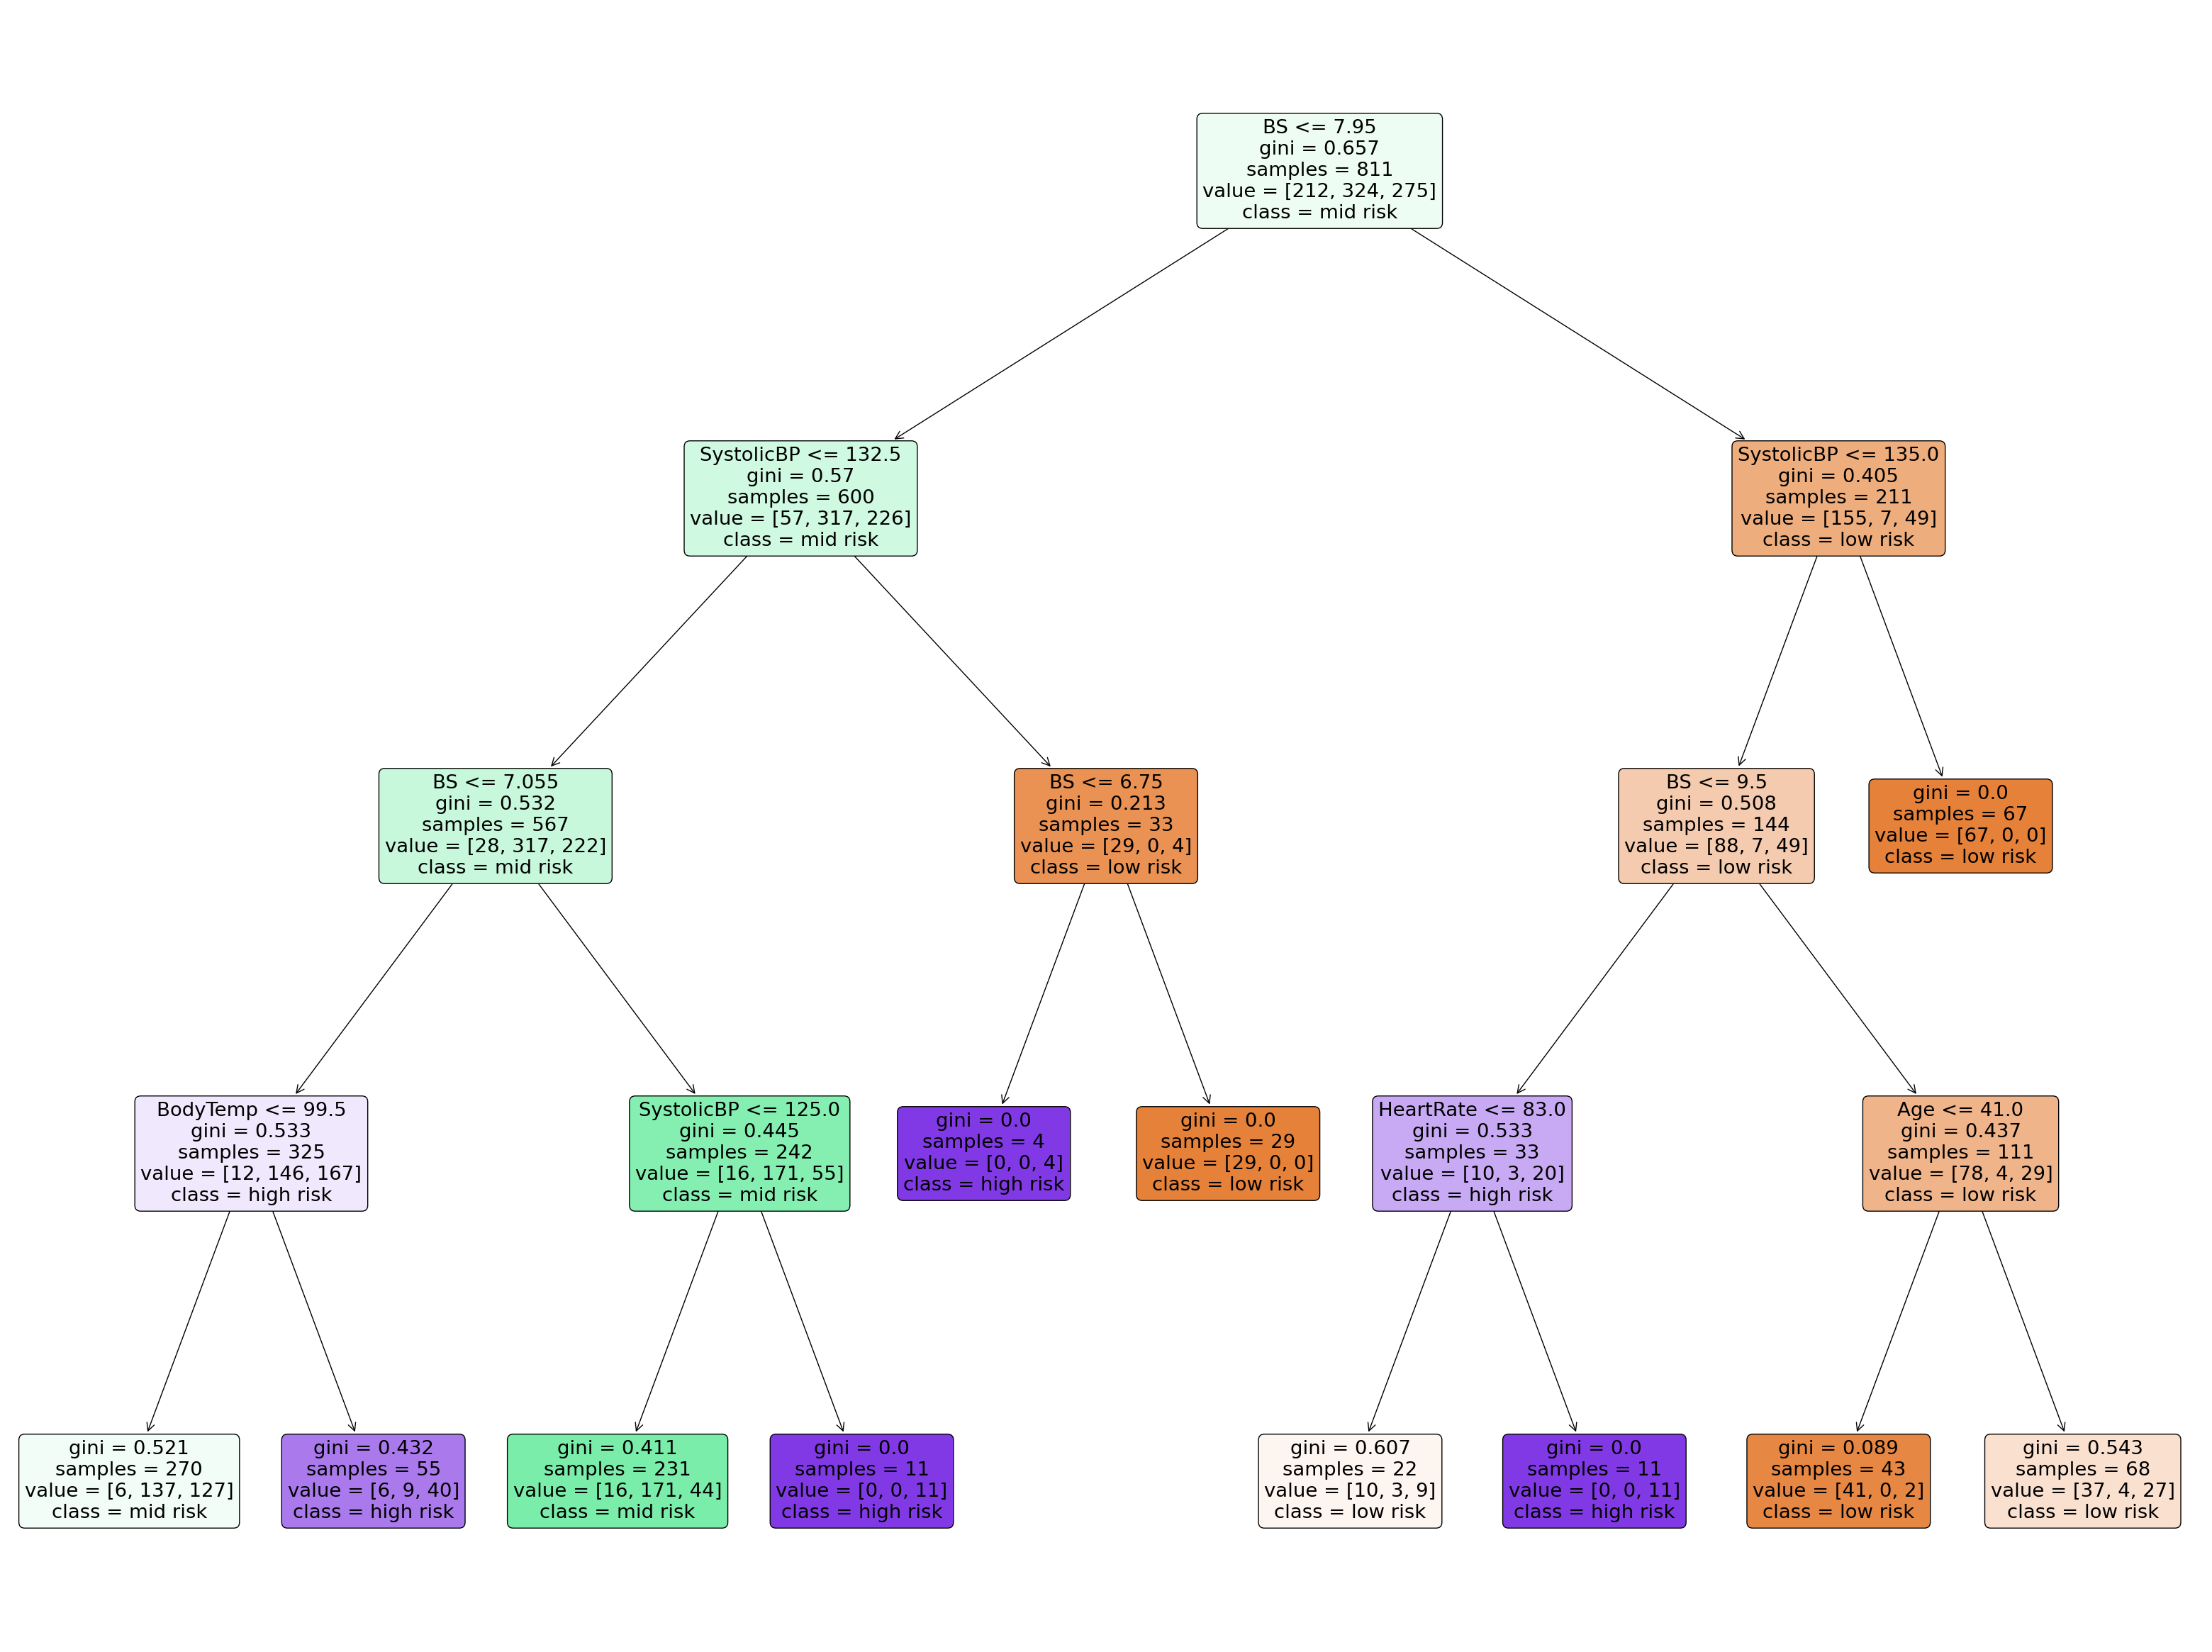

In [ ]:
feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]
plt.figure(figsize=(40,30))
tree.plot_tree(model,feature_names=feature_names, class_names=['low risk','mid risk', "high risk"],filled=True,rounded=True)
plt.show()

## ***5.2 Model Evaluation***

In [ ]:
# Creating a model performance report for the Decision Tree Model
Model_performance = classification_report(y_test, y_pred)
print(f"The report for the Decision Tree Model: \n{Model_performance}\n")

The report for the Decision Tree Model: 
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        60
           1       0.65      0.95      0.77        82
           2       0.58      0.25      0.34        61

    accuracy                           0.70       203
   macro avg       0.70      0.68      0.66       203
weighted avg       0.70      0.70      0.67       203




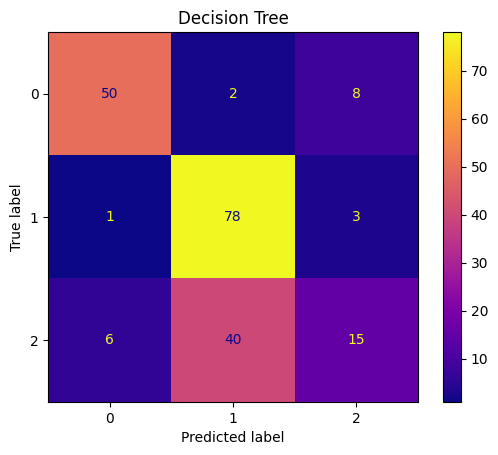

In [ ]:
# Creating a confusion matrix for the Decision Tree Model
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.plasma)
plt.title('Decision Tree')
disp.ax_.grid(False)
plt.show()

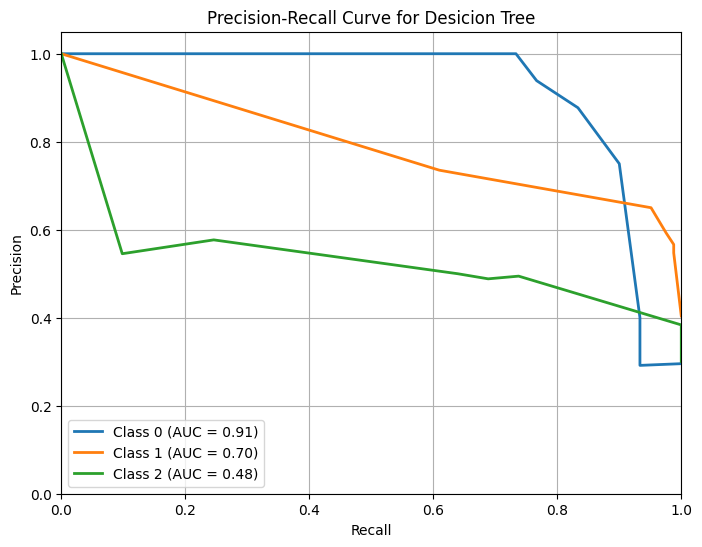

In [ ]:
# Creating a Presicion VS Recall curve for the Desicion Tree Model

y_pred = model.predict_proba(X_test)  # Predict probabilities for all classes
n_classes = len(model.classes_)

# Arrays to store precision, recall, and PR-AUC for each class
precisions = []
recalls = []
pr_aucs = []

# Calculate and plot PR curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred[:, i])
    pr_auc = average_precision_score(y_test == i, y_pred[:, i])

    precisions.append(precision)
    recalls.append(recall)
    pr_aucs.append(pr_auc)

    plt.plot(recall, precision, lw=2, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve for Desicion Tree')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


## ***5.3 Hyperparameter Tuning***

In [ ]:
# Creating a parameter grid to try and improve the Decision Tree model
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
# First technique is using a grid search with 5 cross validation folds to tune the model
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Training the model to tune
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [ ]:
# Second technique is using a randomized search with 5 cross validation folds
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Training the model to tune
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=4,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [ ]:
# Recover the tuned Decision Tree models with the best parameters
gridSearch_model = grid_search.best_estimator_
randomSearch_model = random_search.best_estimator_

# Testing the tuned Decision Tree models by predicting the y values of the X test data
y_pred_tuned1 = gridSearch_model.predict(X_test)
y_pred_tuned2 = randomSearch_model.predict(X_test)

### ***5.3.1 Model Evaluation After Tuning the Model***



In [ ]:
# Creating a model performance report for the Decision Tree Model Tuned With Grid Search CV
Model_performance = classification_report(y_test, y_pred_tuned1)
print(f"The report for the Decision Tree Model Tuned With Grid Search CV: \n{Model_performance}\n")

# Creating a model performance report for the Decision Tree Model Tuned With Randomized Search CV
Model_performance = classification_report(y_test, y_pred_tuned2)
print(f"The report for the Decision Tree Model Tuned With Randomized Search CV: \n{Model_performance}")

The report for the Decision Tree Model Tuned With Grid Search CV: 
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        60
           1       0.84      0.84      0.84        82
           2       0.73      0.79      0.76        61

    accuracy                           0.85       203
   macro avg       0.86      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203


The report for the Decision Tree Model Tuned With Randomized Search CV: 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.86      0.84      0.85        82
           2       0.75      0.82      0.78        61

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



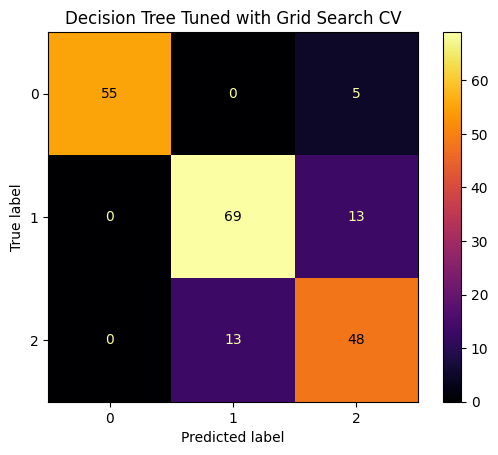

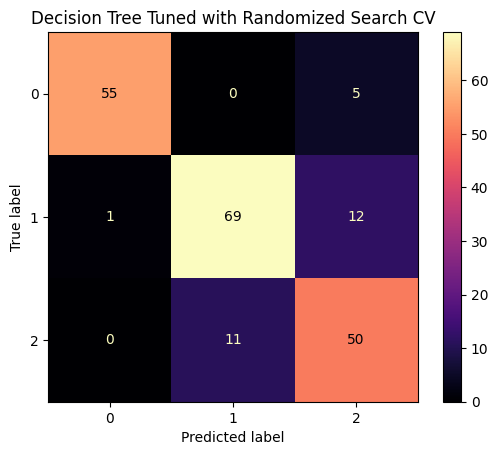

In [ ]:
# Creating a confusion matrix for the Decision Tree Model Tuned with Grid Search CV
cm1 = confusion_matrix(y_test, y_pred_tuned1, labels=gridSearch_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=gridSearch_model.classes_)
disp.plot(cmap=plt.cm.inferno)
plt.title('Decision Tree Tuned with Grid Search CV')
disp.ax_.grid(False)
plt.show()

# Creating a confusion matrix for the Decision Tree Model Tuned with Randomized Search CV
cm2 = confusion_matrix(y_test, y_pred_tuned2, labels=randomSearch_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=randomSearch_model.classes_)
disp.plot(cmap=plt.cm.magma)
plt.title('Decision Tree Tuned with Randomized Search CV')
disp.ax_.grid(False)
plt.show()

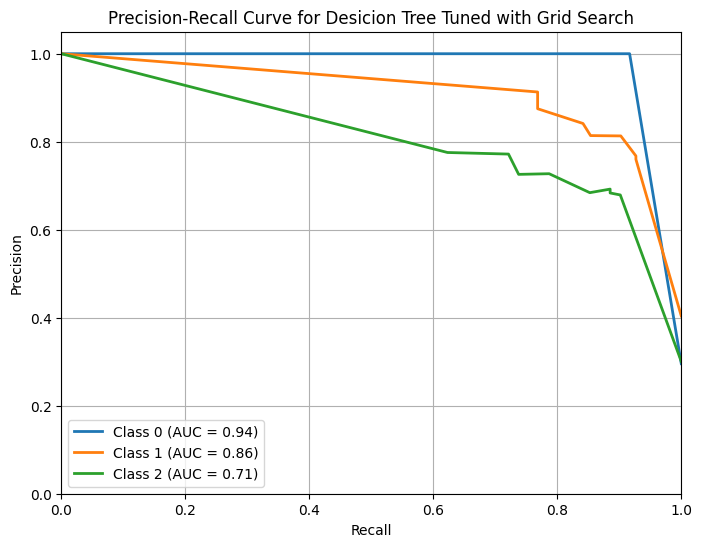

In [ ]:
# Creating a Presicion VS Recall curve for the Desicion Tree Model Tuned with Grid Search CV

y_pred_tuned1 = gridSearch_model.predict_proba(X_test)  # Predict probabilities for all classes
n_classes = len(gridSearch_model.classes_)

# Arrays to store precision, recall, and PR-AUC for each class
precisions = []
recalls = []
pr_aucs = []

# Calculate and plot PR curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_tuned1[:, i])
    pr_auc = average_precision_score(y_test == i, y_pred_tuned1[:, i])

    precisions.append(precision)
    recalls.append(recall)
    pr_aucs.append(pr_auc)

    plt.plot(recall, precision, lw=2, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve for Desicion Tree Tuned with Grid Search')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


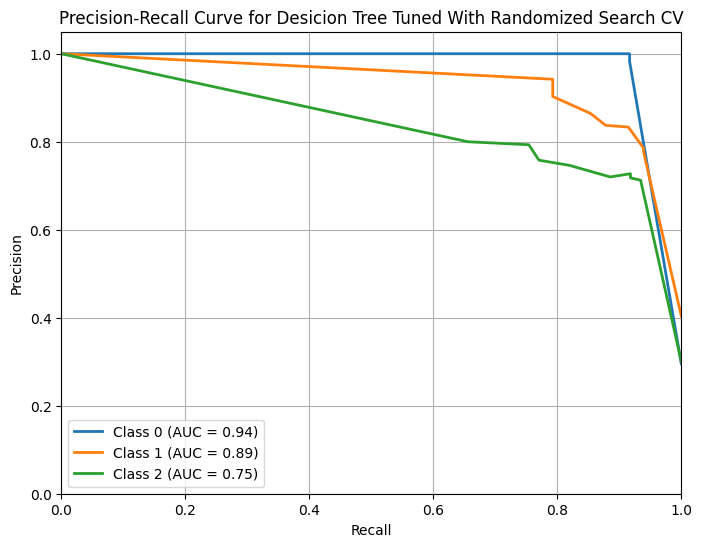

In [ ]:
# Creating a Presicion VS Recall curve for the Desicion Tree Model Tuned with Randomized Search CV

y_pred_tuned2 = randomSearch_model.predict_proba(X_test)  # Predict probabilities for all classes
n_classes = len(randomSearch_model.classes_)

# Arrays to store precision, recall, and PR-AUC for each class
precisions = []
recalls = []
pr_aucs = []

# Calculate and plot PR curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred_tuned2[:, i])
    pr_auc = average_precision_score(y_test == i, y_pred_tuned2[:, i])

    precisions.append(precision)
    recalls.append(recall)
    pr_aucs.append(pr_auc)

    plt.plot(recall, precision, lw=2, label='Class %d (AUC = %0.2f)' % (i, pr_auc))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision-Recall Curve for Desicion Tree Tuned With Randomized Search CV')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


<a name="Con"></a>
# ***6. Conclusion***

The model idenitfied key factors such as blood sugar, blood pressure, body temperature, age, and heart rate. After tuning the model using Randomized Search CV, it was able to correctly classify the high risk, low risk and mid risk participants at a accuracy of 94%, 89% and 75% respectively. With an overall accuracy of 86%. However to improve the classification of the mid risk, further research and a larger dataset might may be used to improve the classification for the mid risk task.